In [9]:
%matplotlib inline
from matplotlib import pylab
import matplotlib.pyplot as plt
import netCDF4 as NC
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from salishsea_tools import tidetools
from salishsea_tools import (nc_tools,viz_tools)
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
import matplotlib.cm as cm

from matplotlib import animation

from numpy import *
from pylab import *

from matplotlib import gridspec

import glob

In [10]:
rd = NC.Dataset('ariane_trajectories_qualitative.nc','r');
rd_lont=rd.variables['traj_lon'][:,1::2]
rd_latt=rd.variables['traj_lat'][:,1::2]
rd_dept=rd.variables['traj_depth'][:,1::2]
rd_xs=rd.variables['init_x'][:]
rd_ys=rd.variables['init_y'][:]
print rd_lont.shape


bathy=NC.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy=bathy.variables['Bathymetry'][:,:]

nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/result_jasper/tracer6/*.nc'))
ptrc=NC.Dataset(nc_filename[0])
lon=ptrc.variables['nav_lon'][:]
lat=ptrc.variables['nav_lat'][:]
dep = ptrc.variables['deptht'][:]

print lon.min(),lon.max()

(135, 10)
-179.997 180.0


In [11]:
print rd_lont.min(),rd_lont.max()
print rd_lont[:,0]

-168.755116932 143.007230042
[-144.39469147 -144.93916532 -144.9992341  -145.01980295 -145.01166806
 -145.03090616 -145.09148409 -145.15825394 -145.2078089  -145.24709764
 -145.2931142  -145.32899406 -145.39148816 -145.47724499 -145.58066735
 -145.70471343 -145.83830777 -145.9539248  -146.08195719 -146.21665834
 -146.32284893 -146.45132187 -146.61360085 -146.77437255 -146.93783526
 -147.09445771 -147.27693555 -147.44854551 -147.61104422 -147.75569909
 -147.93523081 -148.11112482 -148.27349734 -148.44095079 -148.59838784
 -148.74698727 -148.92345149 -149.0955006  -149.2743563  -149.44361264
 -149.60980657 -149.77695345 -149.94990732 -150.12425911 -150.27570985
 -150.42264867 -150.57056137 -150.69412961 -150.79590908 -150.8929073
 -151.00137946 -151.07608928 -151.13471588 -151.19592782 -151.25015993
 -151.32043544 -151.37783219 -151.41038094 -151.4218324  -151.41674082
 -151.38460264 -151.3750606  -151.36398121 -151.34132103 -151.33149647
 -151.34147085 -151.36627171 -151.38191171 -151.4

Black points: end points


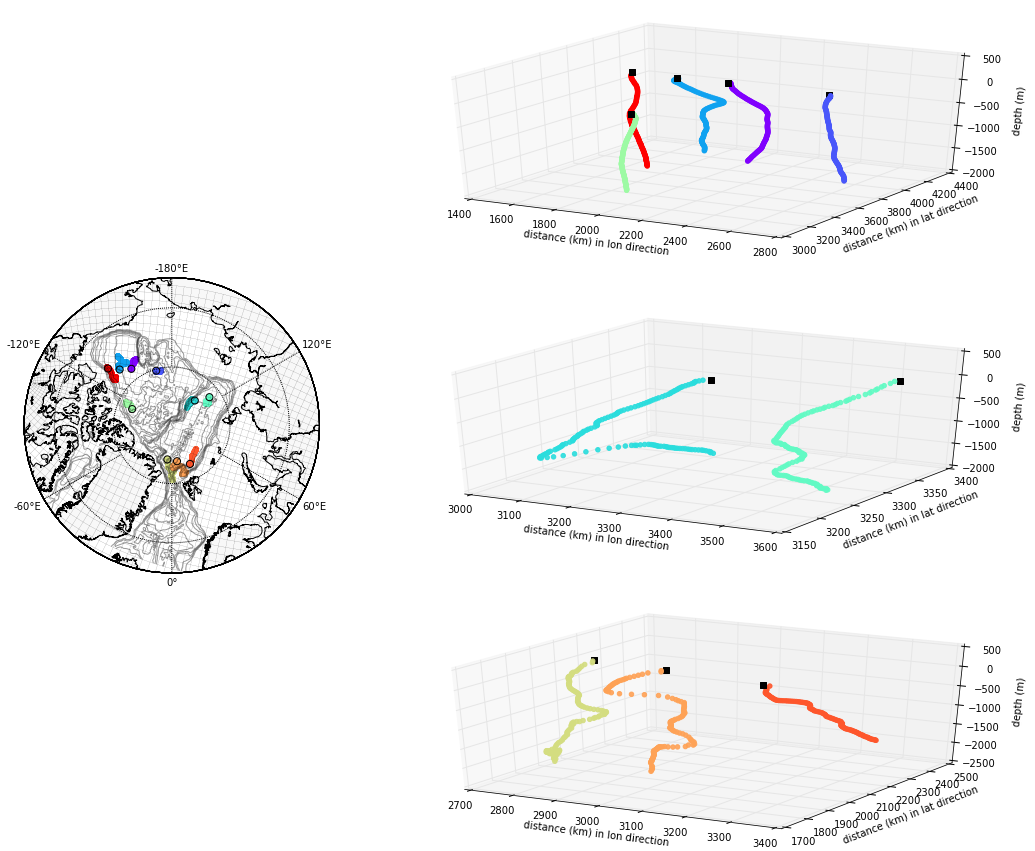

In [31]:
# 3D
n = np.arange(rd_lont.shape[1])
colors = cm.rainbow(np.linspace(0, 1, len(n)))
colors_ = cm.rainbow(np.linspace(0, 1, len(rd_xs)))


fig = plt.figure(figsize=(18,15))
gs = gridspec.GridSpec(3, 3)

ax = fig.add_subplot(gs[:,0])
m = Basemap(projection='npstere',boundinglat=65,lon_0=0,resolution='l',round=True)
m.drawcoastlines()
m.fillcontinents(color = '0.75',alpha=0.1)
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0, 0, 1, 1])
x_lon,y_lat = m(lon,lat)
m.plot(x_lon[::10,::10],y_lat[::10,::10],x_lon.T[::10,::10],y_lat.T[::10,::10],color='k',linewidth=0.1)
tracex,tracey=m(rd_lont,rd_latt)
for N,c in zip(n,colors):
    m.scatter(tracex[1:,N],tracey[1:,N],marker='o',color=c)

# 0/-2  backward/forward
k=0    
m.scatter(tracex[k,:],tracey[k,:],c=colors,s=50)
print 'Black points: starting points'



m.contour(x_lon[420:-10,:],y_lat[420:-10,:],bathy[420:-10,:],linewidth=0.075,colors='black',alpha=0.4)
plt.legend()



ax =fig.add_subplot(gs[0,1:], projection='3d')

for N,c in ((n[x],colors[x]) for x in [0,1,2,5,9]):
    ax.scatter(tracex[1:,N]/1e3,tracey[1:,N]/1e3,rd_dept[1:,N],color=c,alpha=0.9) 
    ax.scatter(tracex[k,N]/1e3,tracey[k,N]/1e3,rd_dept[0,N],c='k',marker='s',s=30)
       
ax.set_xlabel('distance (km) in lon direction')
ax.set_ylabel('distance (km) in lat direction')
ax.set_zlabel('depth (m)')
ax.view_init(elev=30, azim=-60)
#ax.set_zlim(-1830,-1800)


ax =fig.add_subplot(gs[1,1:], projection='3d')

for N,c in ((n[x],colors[x]) for x in [3,4]):
    ax.scatter(tracex[1:,N]/1e3,tracey[1:,N]/1e3,rd_dept[1:,N],color=c,alpha=0.9) 
    ax.scatter(tracex[k,N]/1e3,tracey[k,N]/1e3,rd_dept[0,N],c='k',marker='s',s=30)
       
ax.set_xlabel('distance (km) in lon direction')
ax.set_ylabel('distance (km) in lat direction')
ax.set_zlabel('depth (m)')
ax.view_init(elev=30, azim=-60)
#ax.set_zlim(-1830,-1800)

ax =fig.add_subplot(gs[2,1:], projection='3d')

for N,c in ((n[x],colors[x]) for x in [6,7,8]):
    ax.scatter(tracex[1:,N]/1e3,tracey[1:,N]/1e3,rd_dept[1:,N],color=c,alpha=0.9) 
    ax.scatter(tracex[k,N]/1e3,tracey[k,N]/1e3,rd_dept[0,N],c='k',marker='s',s=30)
       
ax.set_xlabel('distance (km) in lon direction')
ax.set_ylabel('distance (km) in lat direction')
ax.set_zlabel('depth (m)')
ax.view_init(elev=30, azim=-60)
#ax.set_zlim(-1830,-1800)

plt.show()

In [26]:
for N,c in ((n[x],colors[x]) for x in [1,2,3]):
    print N

1
2
3
